#Entrenamiento de los Modelos

##Carga de datos

In [ ]:
#Vamos a importar las librerías que vamos a utilizar.

import pandas as pd                #Importamos la librería pandas. Nos va a servir para leer y manipular conjuntos de datos tabulares.
import matplotlib.pyplot as plt    #Importamos pyplot de librería matplotlib. Lo vamos a utilizar para graficar.
import seaborn as sns              #Importamos la librería Seaborn. La vamos a utilizar para graficar.
import numpy as np                 #Importamos la librería numpy para manipular arreglos.
from google.colab import files

In [ ]:
#Cargamos el archivo data.csv
files.upload()

In [ ]:
# Vamos a leer el conjunto de datos en un dataframe de pandas.
df = pd.read_csv('/content/data.csv')

In [ ]:
#Vamos a realizar una exploración inicial del conjunto de datos.
print('(Número de observaciones, número de atributos) = {}\n'.format(df.shape))

(Número de observaciones, número de atributos) = (7043, 21)



In [ ]:
#Validamos si el conjunto tienen valores nulos
print('¿El conjunto de datos tiene nan?',df.isnull().values.any(),'\n')
print('¿Cuántos nan tiene en total?', df.isnull().sum().sum(),'\n')
#En cuáles de los atributos tenemos valores nan?
diccionario_de_nan = {}
for atributo in df.columns.values:
  diccionario_de_nan[atributo]=df[atributo].isnull().sum()
print('¿Cómo están distribuidos los nan?\n',diccionario_de_nan)

¿El conjunto de datos tiene nan? False 

¿Cuántos nan tiene en total? 0 

¿Cómo están distribuidos los nan?
 {'customerID': 0, 'gender': 0, 'SeniorCitizen': 0, 'Partner': 0, 'Dependents': 0, 'tenure': 0, 'PhoneService': 0, 'MultipleLines': 0, 'InternetService': 0, 'OnlineSecurity': 0, 'OnlineBackup': 0, 'DeviceProtection': 0, 'TechSupport': 0, 'StreamingTV': 0, 'StreamingMovies': 0, 'Contract': 0, 'PaperlessBilling': 0, 'PaymentMethod': 0, 'MonthlyCharges': 0, 'TotalCharges': 0, 'Churn': 0}


In [ ]:
#Revisemos los atributos del conjunto de datos.
print(df.dtypes,'\n')

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object 



In [ ]:
#Debemos cambiar el tipo de dato del atributo: TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [ ]:
#Revisemos de nuevo los atributos del conjunto de datos.
print(df.dtypes,'\n')

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object 



In [ ]:
#Volvamos a revisar si después del cambio del tipo de dato del atributo TotalCharges se presentan NaN
print('¿El conjunto de datos tiene nan?',df.isnull().values.any(),'\n')
print('¿Cuántos nan tiene en total?', df.isnull().sum().sum(),'\n')
#En cuáles de los atributos tenemos valores nan?
diccionario_de_nan = {}
for atributo in df.columns.values:
  diccionario_de_nan[atributo]=df[atributo].isnull().sum()
print('¿Cómo están distribuidos los nan?\n',diccionario_de_nan)

¿El conjunto de datos tiene nan? True 

¿Cuántos nan tiene en total? 11 

¿Cómo están distribuidos los nan?
 {'customerID': 0, 'gender': 0, 'SeniorCitizen': 0, 'Partner': 0, 'Dependents': 0, 'tenure': 0, 'PhoneService': 0, 'MultipleLines': 0, 'InternetService': 0, 'OnlineSecurity': 0, 'OnlineBackup': 0, 'DeviceProtection': 0, 'TechSupport': 0, 'StreamingTV': 0, 'StreamingMovies': 0, 'Contract': 0, 'PaperlessBilling': 0, 'PaymentMethod': 0, 'MonthlyCharges': 0, 'TotalCharges': 11, 'Churn': 0}


In [ ]:
#Encontramos 11 NaN, son pocos y por lo tanto los reemplazamos con la media
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [ ]:
#Ahora tenemos el dataset limpio de datos nulos para comenzar a explorarlo
print('¿El conjunto de datos tiene nan?',df.isnull().values.any(),'\n')
print('¿Cuántos nan tiene en total?', df.isnull().sum().sum(),'\n')
#En cuáles de los atributos tenemos valores nan?
diccionario_de_nan = {}
for atributo in df.columns.values:
  diccionario_de_nan[atributo]=df[atributo].isnull().sum()
print('¿Cómo están distribuidos los nan?\n',diccionario_de_nan)

¿El conjunto de datos tiene nan? False 

¿Cuántos nan tiene en total? 0 

¿Cómo están distribuidos los nan?
 {'customerID': 0, 'gender': 0, 'SeniorCitizen': 0, 'Partner': 0, 'Dependents': 0, 'tenure': 0, 'PhoneService': 0, 'MultipleLines': 0, 'InternetService': 0, 'OnlineSecurity': 0, 'OnlineBackup': 0, 'DeviceProtection': 0, 'TechSupport': 0, 'StreamingTV': 0, 'StreamingMovies': 0, 'Contract': 0, 'PaperlessBilling': 0, 'PaymentMethod': 0, 'MonthlyCharges': 0, 'TotalCharges': 0, 'Churn': 0}


##Procesamiento de datos

In [ ]:
#Primero realizaremos una copia de nuestros datos
dfN = df

In [ ]:
#En este caso vamos a eliminar la columna de costumerID porque no la vamos a utilizar
dfN.drop('customerID',axis='columns',inplace=True)

In [ ]:
#revisemos los valores de las columnas para saber si podemos realizar algun cambio
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [ ]:
print_unique_col_values(dfN)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [ ]:
#Vamos a cambiar los no internet service y no phone service por simplemente "No"
dfN.replace('No internet service','No',inplace=True)
dfN.replace('No phone service','No',inplace=True)

In [ ]:
#Volvamos a revisar si cambio los valores de las columnas
print_unique_col_values(dfN)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [ ]:
#Cambiemos los "Yes" y "No" por 1 y 0
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    dfN[col].replace({'Yes': 1,'No': 0},inplace=True)

In [ ]:
for col in dfN:
    print(f'{col}: {dfN[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [ ]:
#Remplazemos tambien el genero por 0 para hombre y 1 para mujer
dfN['gender'].replace({'Female':1,'Male':0},inplace=True)

In [ ]:
#Separemos en columnas las opciones de las columnas "internetService", "contract" y "PaymerMethod" para que sean 
#numerico todo
df1 = pd.get_dummies(data=dfN, columns=['InternetService','Contract','PaymentMethod'])
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2074,1,1,0,0,43,1,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0
3938,1,0,0,0,2,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
767,0,0,0,0,14,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4070,0,1,1,0,55,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
6900,0,1,0,0,51,1,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0


In [ ]:
df1.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)

In [ ]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber_optic                  uint8
InternetService_No             

In [ ]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distribution Before Resampling')

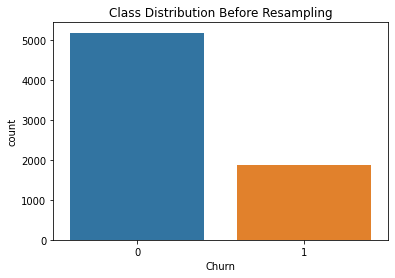

In [ ]:
sns.countplot('Churn', data=df1).set_title('Class Distribution Before Resampling')

In [ ]:
X_no = df1[df1.Churn == 0]
X_yes = df1[df1.Churn == 1]

In [ ]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))

5174


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distribution After Resampling')

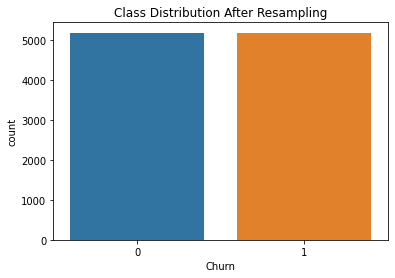

In [ ]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)
sns.countplot('Churn', data=X_upsampled).set_title('Class Distribution After Resampling')

In [ ]:
X = X_upsampled.drop(['Churn'], axis=1) #features (independent variables)
y = X_upsampled['Churn'] #target (dependent variable)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
X_train.shape

(8278, 26)

In [ ]:
X_test.shape

(2070, 26)

##BaseLine Model (Regresión Logistica)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix , confusion_matrix ,classification_report, accuracy_score, recall_score

reg = LogisticRegression(max_iter=1000)
reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_reg = reg.predict(X_test)

In [ ]:
y_pred_train_reg = reg.predict(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


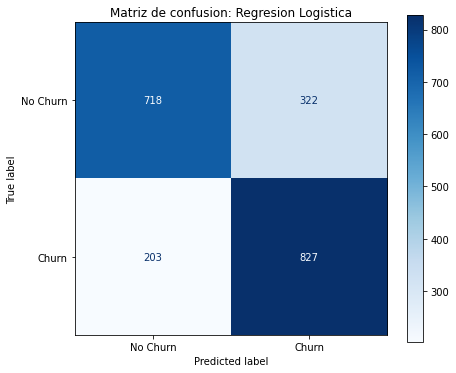

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


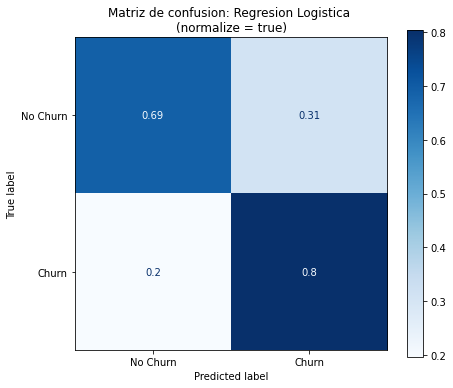

Accuracy Score Train:  0.765402271079971
Accuracy Score Test:  0.7463768115942029


In [ ]:
fig, ax = plt.subplots(figsize=(7,6))
plot_confusion_matrix(reg,X_test,y_test,display_labels=["No Churn","Churn"],cmap=plt.cm.Blues,normalize=None,ax=ax)
ax.set_title("Matriz de confusion: Regresion Logistica")
plt.show()

fig, ax = plt.subplots(figsize=(7,6))
plot_confusion_matrix(reg,X_test,y_test,display_labels=["No Churn","Churn"],cmap=plt.cm.Blues,normalize='true',ax=ax)
ax.set_title("Matriz de confusion: Regresion Logistica \n(normalize = true)")
plt.show()

print("Accuracy Score Train: ",accuracy_score(y_train,y_pred_train_reg))
print("Accuracy Score Test: ",accuracy_score(y_test,y_pred_reg))

In [ ]:
print(classification_report(y_test,y_pred_reg))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73      1040
           1       0.72      0.80      0.76      1030

    accuracy                           0.75      2070
   macro avg       0.75      0.75      0.75      2070
weighted avg       0.75      0.75      0.75      2070



##XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import plot_tree
import math

Train accuracy XGB:  0.7977772408794395
Test accuracy XGB:  0.7661835748792271
Recall Score:  0.8359223300970874
----------------------------------------------------------------------------------------------------


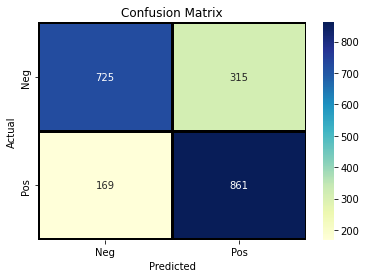

In [ ]:
clf_xgb = XGBClassifier()
clf_xgb.fit(X_train,y_train)

result4 = ["4.","XGBClassifier","Balanced using scale_pos_weight"]
y_pred_tr = clf_xgb.predict(X_train)
print('Train accuracy XGB: ',accuracy_score(y_train,y_pred_tr))
result4.append(round(accuracy_score(y_train,y_pred_tr),2))

y_pred_test = clf_xgb.predict(X_test)
print('Test accuracy XGB: ',accuracy_score(y_test,y_pred_test))
result4.append(round(accuracy_score(y_test,y_pred_test),2))

recall = recall_score(y_test,y_pred_test)
print("Recall Score: ",recall)
result4.append(round(recall,2))
print("-----"*20)

cm = confusion_matrix(y_test,y_pred_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75      1040
           1       0.73      0.84      0.78      1030

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



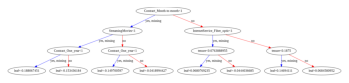

In [ ]:
from xgboost import plot_tree
plot_tree(clf_xgb)
plt.show()

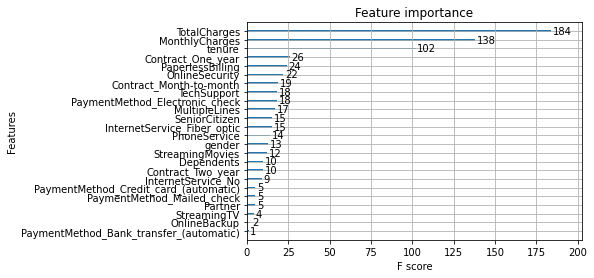

In [ ]:
xgb.plot_importance(clf_xgb)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

##XGBoost con ajuste de hiperparámetros

In [ ]:
scale=round(math.sqrt(y_train.value_counts()[0]/y_train.value_counts()[1]),2)

# Grid Search To Get Best Hyperparameters
parameters = {"learning_rate"    : [0.10,0.20,0.30 ],\
              "max_depth"        : [ 3,5,10,20],\
              "n_estimators" : [ 100, 200, 300, 500],\
              "colsample_bytree" : [ 0.3, 0.5, 0.7 ] }
clf_xgb = XGBClassifier(scale_pos_weight=scale, eval_metric ='mlogloss')
grid = GridSearchCV(estimator=clf_xgb, param_grid=parameters, scoring='accuracy',return_train_score=True,verbose=1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(estimator=XGBClassifier(eval_metric='mlogloss',
                                     scale_pos_weight=1.0),
             param_grid={'colsample_bytree': [0.3, 0.5, 0.7],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [3, 5, 10, 20],
                         'n_estimators': [100, 200, 300, 500]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.2,
 'max_depth': 20,
 'n_estimators': 200}

Train accuracy XGB:  0.9978255617298865
Test accuracy XGB:  0.8893719806763285
Recall Score:  0.962135922330097
----------------------------------------------------------------------------------------------------


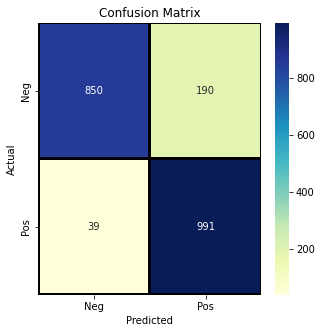

In [ ]:
clf_xgb = XGBClassifier(learning_rate= grid.best_params_['learning_rate'] ,max_depth=grid.best_params_ ['max_depth'], n_estimators=grid.best_params_['n_estimators'], colsample_bytree=grid.best_params_['colsample_bytree'],
                        eval_metric='mlogloss',scale_pos_weight=scale)
clf_xgb.fit(X_train,y_train)

result4 = ["4.","XGBClassifier","Balanced using scale_pos_weight"]
y_pred_tr = clf_xgb.predict(X_train)
print('Train accuracy XGB: ',accuracy_score(y_train,y_pred_tr))
result4.append(round(accuracy_score(y_train,y_pred_tr),2))

y_pred_test = clf_xgb.predict(X_test)
print('Test accuracy XGB: ',accuracy_score(y_test,y_pred_test))
result4.append(round(accuracy_score(y_test,y_pred_test),2))

recall = recall_score(y_test,y_pred_test)
print("Recall Score: ",recall)
result4.append(round(recall,2))
print("-----"*20)

cm = confusion_matrix(y_test,y_pred_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88      1040
           1       0.84      0.96      0.90      1030

    accuracy                           0.89      2070
   macro avg       0.90      0.89      0.89      2070
weighted avg       0.90      0.89      0.89      2070



In [ ]:
from xgboost import plot_tree
plot_tree(clf_xgb)
plt.rcParams['figure.figsize'] = [100, 100]
plt.show()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.625778 to fit


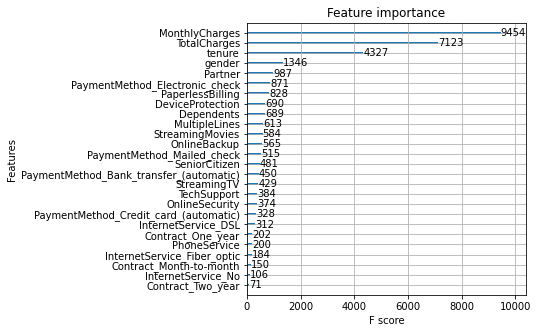

In [ ]:
xgb.plot_importance(clf_xgb)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [ ]:
import joblib

#joblib.dump(clf_xgb, "xgb.joblib")

In [ ]:
clf_xgb.save_model("churnModel.bin")

##XGBoost con las caracteristicas mas reelevantes

In [ ]:
df3=df1[['tenure','MonthlyCharges','TotalCharges']]
X = df3
y = df1['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

Train accuracy XGB:  0.9290024849130281
Test accuracy XGB:  0.7601135557132718
Recall Score:  0.45595854922279794
----------------------------------------------------------------------------------------------------


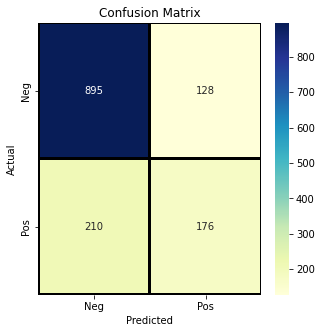

In [ ]:
clf_xgb = XGBClassifier(learning_rate=0.2,max_depth=20, n_estimators=200, colsample_bytree=0.5,
                        eval_metric='mlogloss',scale_pos_weight=scale)
clf_xgb.fit(X_train,y_train)

result4 = ["4.","XGBClassifier","Balanced using scale_pos_weight"]
y_pred_tr = clf_xgb.predict(X_train)
print('Train accuracy XGB: ',accuracy_score(y_train,y_pred_tr))
result4.append(round(accuracy_score(y_train,y_pred_tr),2))

y_pred_test = clf_xgb.predict(X_test)
print('Test accuracy XGB: ',accuracy_score(y_test,y_pred_test))
result4.append(round(accuracy_score(y_test,y_pred_test),2))

recall = recall_score(y_test,y_pred_test)
print("Recall Score: ",recall)
result4.append(round(recall,2))
print("-----"*20)

cm = confusion_matrix(y_test,y_pred_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.rcParams['figure.figsize'] = [2, 2]
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1023
           1       0.58      0.46      0.51       386

    accuracy                           0.76      1409
   macro avg       0.69      0.67      0.68      1409
weighted avg       0.75      0.76      0.75      1409



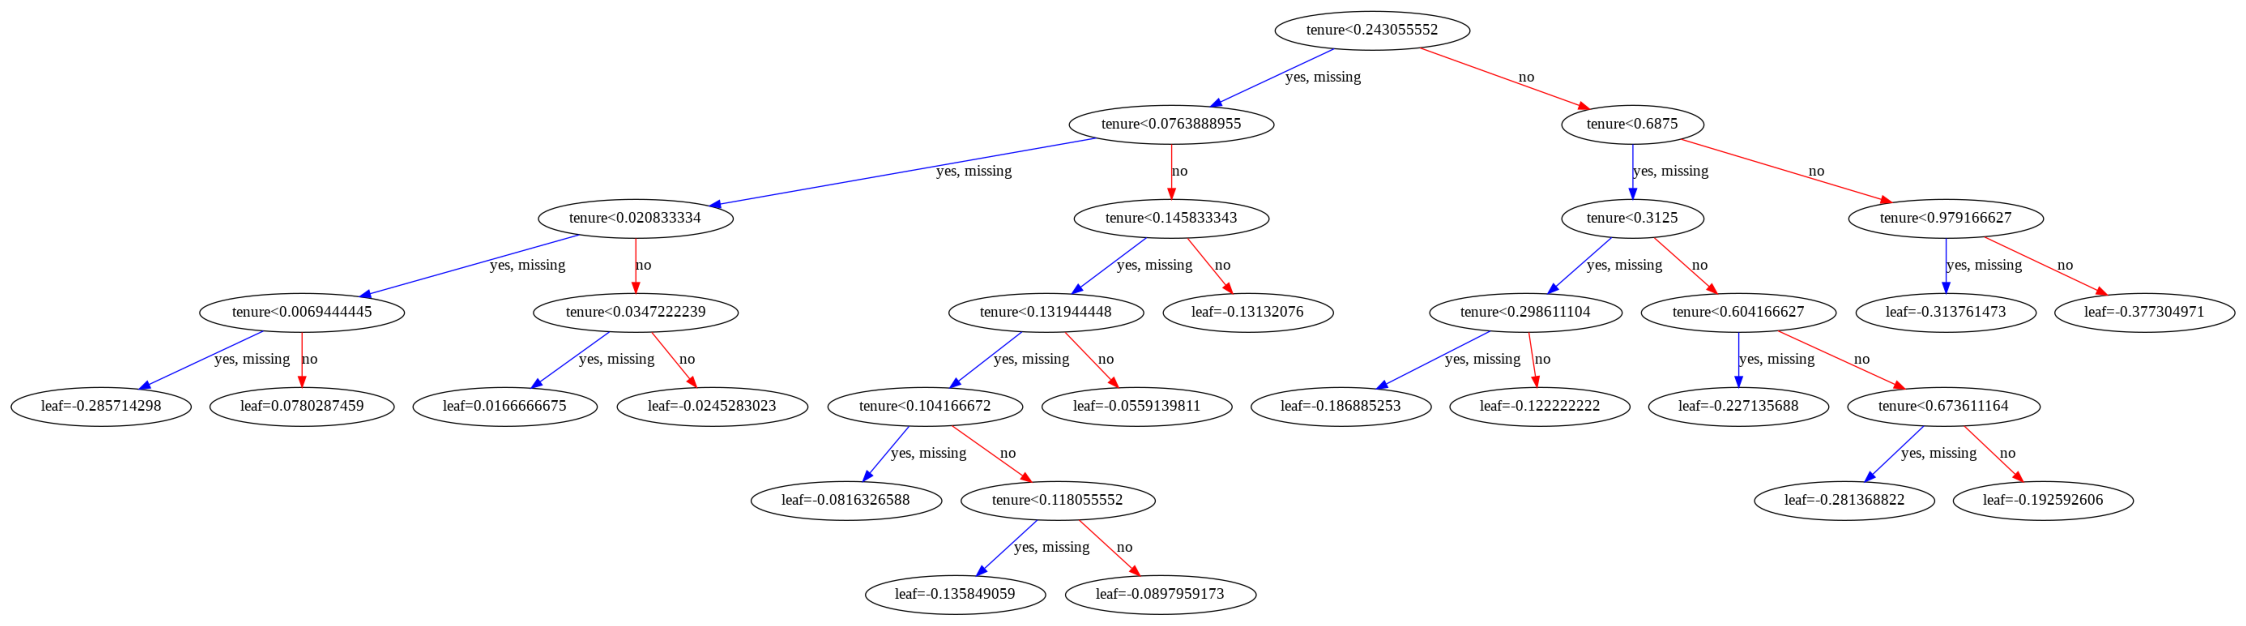

In [ ]:
from xgboost import plot_tree
plot_tree(clf_xgb)
plt.rcParams['figure.figsize'] = [60, 60]
plt.show()

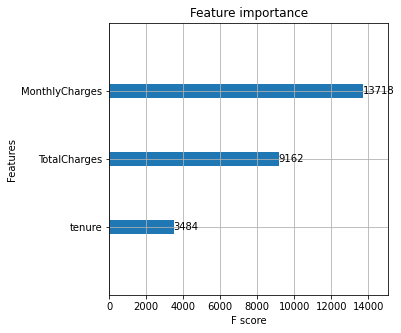

In [ ]:
xgb.plot_importance(clf_xgb)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

##Red Neuronal

In [ ]:
X = X_upsampled.drop(['Churn'], axis=1) #features (independent variables)
y = X_upsampled['Churn'] #target (dependent variable)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=500)

Epoch 1/500
259/259 [==============================] - 4s 5ms/step - loss: 0.5383 - accuracy: 0.7377
Epoch 2/500
259/259 [==============================] - 1s 4ms/step - loss: 0.4902 - accuracy: 0.7586
Epoch 3/500
259/259 [==============================] - 1s 4ms/step - loss: 0.4796 - accuracy: 0.7666
Epoch 4/500
259/259 [==============================] - 1s 5ms/step - loss: 0.4741 - accuracy: 0.7656
Epoch 5/500
259/259 [==============================] - 1s 4ms/step - loss: 0.4702 - accuracy: 0.7723
Epoch 6/500
259/259 [==============================] - 1s 4ms/step - loss: 0.4666 - accuracy: 0.7685
Epoch 7/500
259/259 [==============================] - 1s 5ms/step - loss: 0.4645 - accuracy: 0.7765
Epoch 8/500
259/259 [==============================] - 1s 5ms/step - loss: 0.4618 - accuracy: 0.7765
Epoch 9/500
259/259 [==============================] - 1s 5ms/step - loss: 0.4589 - accuracy: 0.7792
Epoch 10/500
259/259 [==============================] - 2s 9ms/step - loss: 0.4569 - accura

In [ ]:
model.evaluate(X_test, y_test)

65/65 [==============================] - 0s 2ms/step - loss: 0.5234 - accuracy: 0.7961


[0.5233854651451111, 0.7961352467536926]

In [ ]:
yp = model.predict(X_test)
yp[:5]

array([[6.6201377e-01],
       [3.6079288e-03],
       [8.4938228e-02],
       [1.3003051e-03],
       [5.6454539e-04]], dtype=float32)

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred[:10]

[1, 0, 0, 0, 0, 1, 1, 1, 1, 0]

In [ ]:
y_test[:10]

5767    1
4962    0
3454    0
1301    0
4249    0
7194    1
7497    1
5753    1
7126    1
974     0
Name: Churn, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1040
           1       0.75      0.87      0.81      1030

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.79      2070



Text(69.0, 0.5, 'Truth')

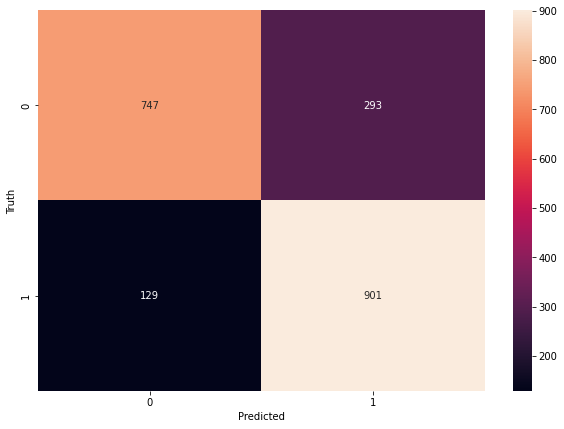

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## **MODELO MAQUINA DE SOPORTE VECTORIAL (SVM)**

In [ ]:
#utilizando la limpieza de los datos hechos anteriormente nos servira de inicio para el soporte vectorial
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

In [ ]:
# Definimos la configuración del clasificador
from sklearn.pipeline import make_pipeline
from sklearn import datasets, svm, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [ ]:
#entrenamos el modelo
clf.fit(X_test, y_test)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

0.8173913043478261


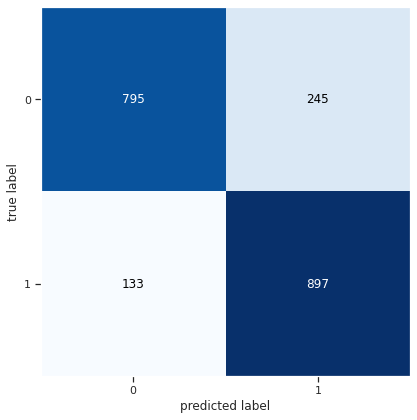

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

score = clf.score(X_test, y_test)
print(score)

ypred = clf.predict(X_test)
matriz = confusion_matrix(y_test,ypred)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1040
           1       0.79      0.87      0.83      1030

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070

